# Group 24
* Sebastian Häni <haeniseb@students.zhaw.ch>
* Raffael Affolter <affolraf@students.zhaw.ch>
* Benjamin Mäder <maedeben@students.zhaw.ch>

## MLP with TensorFlow 2.0
The objective of the exercise is to implement computational graphs in TensorFlow 2.0 to train and use such an architecture. The constraints we put ourselves is to use **low-level** functions of TensorFlow, i.e. we will not use high-level functions to compose layers and to train the parameters.

If you get this error in the execution of the first cell: ` ModuleNotFoundError: No module named 'tensorflow' `, it probably means TensorFlow 2.0 is not installed yet on your machine.

In [5]:
#############################
# MNIST Dataset Preparation #
#############################

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist
(x_train, y_train_vec),(x_test, y_test_vec) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train_vec, 10, dtype='float64')
y_test = tf.keras.utils.to_categorical(y_test_vec, 10, dtype='float64')
N = x_train.shape[0]         # number of samples
D = x_train.shape[1]         # dimension of input sample
n_classes = y_train.shape[1] # output dim
print('MNIST data set ready. N={}, D={}, n_classes={}'.format(N,D,n_classes))

MNIST data set ready. N=60000, D=784, n_classes=10


In [6]:
# Function to sample a random batch from dataset
def next_batch(num, data, labels):
    '''
    Return a total of `num` random samples and labels. 
    '''
    idx = np.arange(0,len(data))  # create an array of index values
    np.random.shuffle(idx)        # shuffle it
    idx = idx[:num]               # take the first n indexes = size of batch
    data_shuffle = data[idx]      # extract the batch using the random indexes
    labels_shuffle = labels[idx]  # extract the labels using the random indexes

    return data_shuffle, labels_shuffle

In [47]:
##################
# Training phase #
##################

E = 50                # number of epochs
B = 128               # batch size
N = x_train.shape[0]  # number of samples
D = x_train.shape[1]  # dimension of input sample
H = 300               # number of neurons
A = 0.01              # learning rate alpha

##############################################
#  COMPLETE CODE BELOW WHERE YOU SEE # ...   #
##############################################

# Build the computational graph
@tf.function # this decorator tells tf that a graph is defined
def mlp_train(x, y, alpha):
    # define nodes for forward computation for hidden neurons h and output neurons y_pred
    h = tf.nn.relu(tf.add(tf.matmul(x, w1, name='h_matmul'), b1, name='h_add'), name='h_max') # output of first layer after ReLu activation
    y_pred = tf.sigmoid(tf.add(tf.matmul(h, w2, name='pred_matmul'), b2, name='pred_add'), name='pred_sigmoid') # output of second layer after sigmoid activation
    # define nodes for forward computation for hidden neurons h and output neurons y_pred
    diff = y_pred - y
    loss = tf.reduce_mean(tf.pow(diff, 2))
    # define the gradients
    grad_w1, grad_b1, grad_w2, grad_b2 = tf.gradients(ys=loss, xs=[w1, b1, w2, b2])
    # compute the new values of the gradients with the assign method (see slides)
    w1.assign(w1 - alpha * grad_w1)
    b1.assign(b1 - alpha * grad_b1)
    w2.assign(w2 - alpha * grad_w2)
    b2.assign(b2 - alpha * grad_b2)
    return y_pred, loss

# Init the tf.Variables w1, b1, w2, b2 following the given examples
w1 = tf.Variable(tf.random.truncated_normal((D, H), stddev=0.1, dtype='float64'))
b1 = tf.Variable(tf.constant(0.0, shape=[H], dtype='float64'))
w2 = tf.Variable(tf.random.truncated_normal((H, n_classes), stddev=0.1, dtype='float64'))
b2 = tf.Variable(tf.constant(0.0, shape=[n_classes], dtype='float64'))

# Run the computational graph
J = []  # to store the evolution of loss J for each epoch
                 
for epoch in range(E):
    J_epoch = 0.0
    for _ in range(int(N/B)): # number of batches to visit for 1 epoch
        # get batches calling the next_batch method provided above
        x_train_batch, y_train_batch = next_batch(B, x_train, y_train)
        with tf.device('/CPU:0'):  # change to /GPU:0 to move it to GPU
            # call the graph with the batched input, target and alpha A
            out = mlp_train(x_train_batch, y_train_batch, A)
        y_pred, loss_val = out
        J_epoch += loss_val
    J.append(J_epoch)
    print("epoch = {}, loss = {}".format(epoch, J_epoch))

epoch = 0, loss = 57.598444551356366
epoch = 1, loss = 41.02711154231459
epoch = 2, loss = 38.499862188032516
epoch = 3, loss = 36.49331583007044
epoch = 4, loss = 34.58815715478235
epoch = 5, loss = 32.779080146741805
epoch = 6, loss = 31.08604595836327
epoch = 7, loss = 29.422267066519282
epoch = 8, loss = 28.0085547082279
epoch = 9, loss = 26.744049103626413
epoch = 10, loss = 25.599256273959973
epoch = 11, loss = 24.650117844616993
epoch = 12, loss = 23.65740811474678
epoch = 13, loss = 22.774116512990773
epoch = 14, loss = 22.035966960121467
epoch = 15, loss = 21.36298056321549
epoch = 16, loss = 20.57745539139201
epoch = 17, loss = 20.180491555965588
epoch = 18, loss = 19.496152514339414
epoch = 19, loss = 19.094305240505467
epoch = 20, loss = 18.618794067532708
epoch = 21, loss = 18.144034716920928
epoch = 22, loss = 17.944000937812593
epoch = 23, loss = 17.52812001035628
epoch = 24, loss = 17.1962545842441
epoch = 25, loss = 16.828485893273854
epoch = 26, loss = 16.661732298543

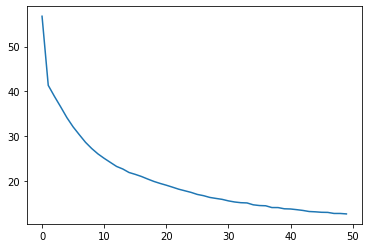

In [26]:
# Plot the evolution of the loss
plt.plot(J)

In [27]:
#################
# Testing phase #
#################

N = x_test.shape[0]  # number of samples
D = x_test.shape[1]  # dimension of input sample

##############################################
#  COMPLETE CODE BELOW WHERE YOU SEE # ...   #
##############################################
# Build the computational graph
@tf.function # this decorator tells tf that a graph is defined
def mlp_test(x, y):
    h = tf.nn.relu(tf.add(tf.matmul(x, w1, name='h_matmul'), b1, name='h_add'), name='h_max') # output of first layer after ReLu activation
    y_pred = tf.sigmoid(tf.add(tf.matmul(h, w2, name='pred_matmul'), b2, name='pred_add'), name='pred_sigmoid') # output of second layer after sigmoid activation
    return y_pred

# Run the computational graph
with tf.device('/CPU:0'):  # change to /GPU:0 to move it to GPU
    y_pred_test = mlp_test(x_test, y_test)

print('Forward pass on test set done.')
# At this stage, y_pred_test should contain the matrix of outputs on the test set with shape (N_test, 10)

Forward pass on test set done.


In [28]:
# compute accuracy
y_winner = np.argmax(y_pred_test, axis=1)
N_test = y_winner.size
num_correct = (y_winner == y_test_vec).sum()
num_missed = N_test - num_correct
accuracy = num_correct * 1.0 / N_test
error_rate = num_missed * 1.0 / N_test
print('# samples  : ', N_test)
print('# correct  : ', num_correct)
print('# missed   : ', num_missed)
print('accuracy   :  %2.2f %%'% (accuracy*100.0))
print('error rate :  %2.2f %%'% (error_rate*100.0))

# samples  :  10000
# correct  :  8779
# missed   :  1221
accuracy   :  87.79 %
error rate :  12.21 %


# Using Keras

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation 

model = Sequential([
    Dense(H, input_shape=(D,)),
    Activation('relu'),
    Dense(n_classes),
    Activation('sigmoid'),
])

model.summary()

sgd = tf.keras.optimizers.SGD(learning_rate=0.5)

model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])

history1 = model.fit(x_train, y_train, epochs=40)

model.evaluate(x_test, y_test, verbose=2)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 300)               235500    
_________________________________________________________________
activation (Activation)      (None, 300)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                3010      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples
Epoch 1/40
60000/60000 [==============================] - 5s 87us/sample - loss: 0.0275 - accuracy: 0.8618
Epoch 2/40
60000/60000 [==============================] - 5s 80us/sample - loss: 0.0148 - accuracy: 0.9218
Epoch 3/4

[0.0037546340467459233, 0.9808]

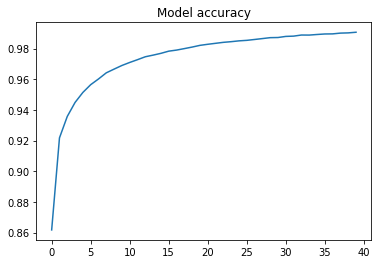

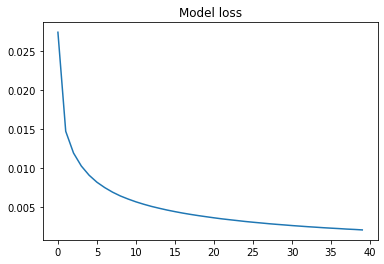

In [46]:
plt.plot(history1.history['accuracy'])
plt.title('Model accuracy')
plt.show()

plt.plot(history1.history['loss'])
plt.title('Model loss')
plt.show()

The Keras model is quite a large bit better in accuracy / loss. 

In terms of CPU used to train, it's quite similar. I could not train on a GPU sadly.